In [29]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline
sns.set()

In [4]:
with open('Series/war_and_peace_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-яё ]','', text)

In [8]:
russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(russian)}

In [9]:
probabilities = np.zeros((len(russian), len(russian)))

In [10]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [11]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [12]:
df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))

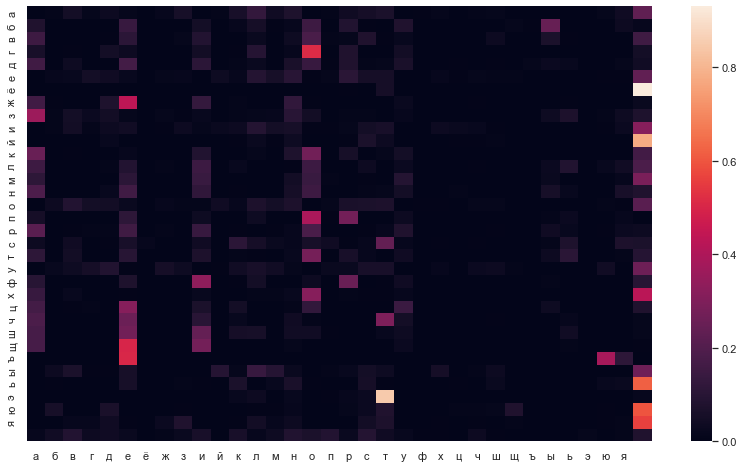

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [15]:
start = POS['п']
end = POS['р']
prior = 1. / len(russian)
for c in russian:
    for b in russian:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[b]] * probabilities[POS[c], end]
        if proba > 0:
            print(''.join(['п', c, b, 'р']), proba)

паар 1.4618370858596316e-08
пабр 5.76761177511891e-07
павр 2.935634656967205e-06
пагр 8.212866536920477e-07
падр 1.8153358720765973e-06
паер 7.26931714513835e-07
пажр 1.0153123032697805e-06
пазр 3.3927909819996722e-06
паир 1.262495665060591e-07
пайр 6.471951461942187e-07
пакр 3.685158399171599e-06
палр 7.540421477425045e-06
памр 2.284452682357006e-06
панр 4.366906058304318e-06
паор 3.4552512938500384e-08
папр 6.339057181409494e-07
парр 2.292426339188968e-06
паср 3.188133789979324e-06
патр 3.980183701954179e-06
паур 1.1694696686877053e-07
пафр 4.3323535453658173e-07
пахр 8.279313677186824e-07
пацр 7.442079709830853e-08
пачр 6.246031185036608e-07
пашр 8.319181961346632e-07
пащр 2.0067036360436765e-07
паэр 1.3289428053269377e-09
паюр 6.604845742474881e-07
паяр 2.366847136287276e-06
па р 1.3827649889426789e-05
пгар 8.745119543184372e-08
пгвр 6.492588751758095e-09
пгдр 7.32735016269842e-08
пгер 4.7965655676253675e-08
пгзр 1.325018112603693e-10
пгир 6.90334436666524e-08
пгкр 8.87762135444474

In [26]:
s = ['б']
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

боре да 


In [33]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")["Close"]
values = series.values.reshape(-1,1)

In [34]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582108
2 -820.6341453620586
3 -786.8375332667699
4 -752.0201472668992
5 -737.1181111930921
6 -729.567111258945
7 -713.7234280415851
8 -702.1071055163613
9 -690.9838068209659
10 -691.7472727877399


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -682.0166244353851


Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -675.3542290738002
13 -659.7328432808413


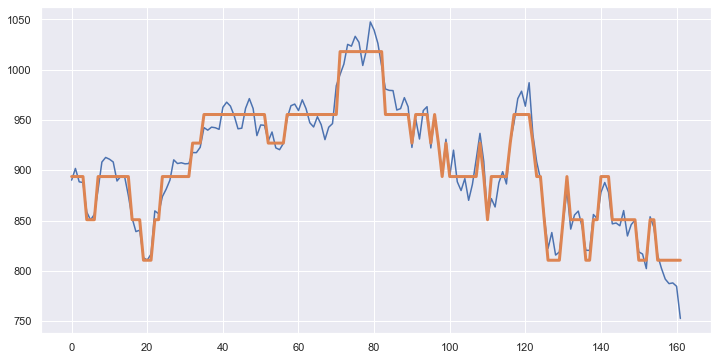

In [35]:
model = GaussianHMM(n_components=6,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

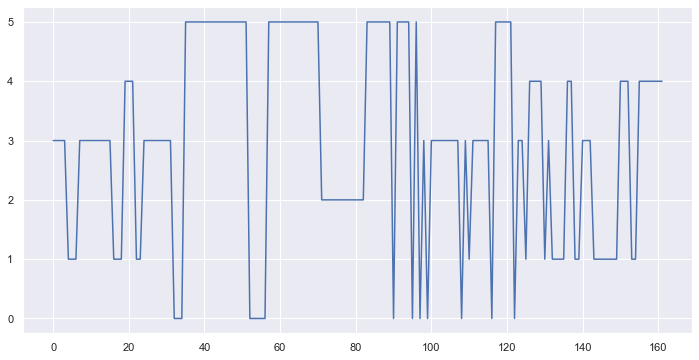

In [37]:
prediction = model.predict(values)
plt.figure(figsize=(12, 6))
plt.plot(prediction)